In [62]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

xgb.__version__

'1.6.2'

In [20]:
full_dataset = pd.read_pickle('../data/cleaned/full_dataset.pkl')
model_dataset = full_dataset[full_dataset[['CO_openweather', 'NO2_openweather', 'SO2_openweather', 'PM2_5_openweather']].notna().all(1)].sort_index()
# model_dataset

In [11]:
x_cols = ['NO2_govt', 'SO2_govt', 'CO_govt', 'PM2.5_govt', 'NH3_govt', 'BC_sat', 'CO_sat', 'NO2_sat', 'SO2_sat']
y_cols = ['CO_openweather', 'NO2_openweather', 'SO2_openweather', 'PM2_5_openweather']
train = model_dataset.loc['2020-01-01': '2021-12-31']
X_train = train[x_cols]
y_train = train[y_cols]

test = model_dataset.loc['2022-01-01':]
test = test[test[['CO_openweather', 'NO2_openweather', 'SO2_openweather', 'PM2_5_openweather']].notna().all(1)]
X_test = test[x_cols]
y_test = test[y_cols]

In [61]:
xgbr = xgb.XGBRegressor(n_estimators=400, random_state=0, n_jobs=-1)
xgbr.fit(X_train, y_train)
# clf = RandomizedSearchCV(random_state=0, n_jobs=-1)
# distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# distributions

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [64]:
mlp = MLPClassifier()
mlp.fit(X_train.fillna(-999), y_train.fillna(-999))
mlp.score(X_test.fillna(-999), y_test.fillna(-999))

ValueError: Multioutput target data is not supported with label binarization

In [28]:
xgbr.score(X_test, y_test)

0.17640798987831852

In [38]:
y_predict = pd.DataFrame(clf.predict(X_test))
y_predict.columns = [c + '_predict' for c in y_test.columns]
y_predict = y_predict.set_index(y_test.index)

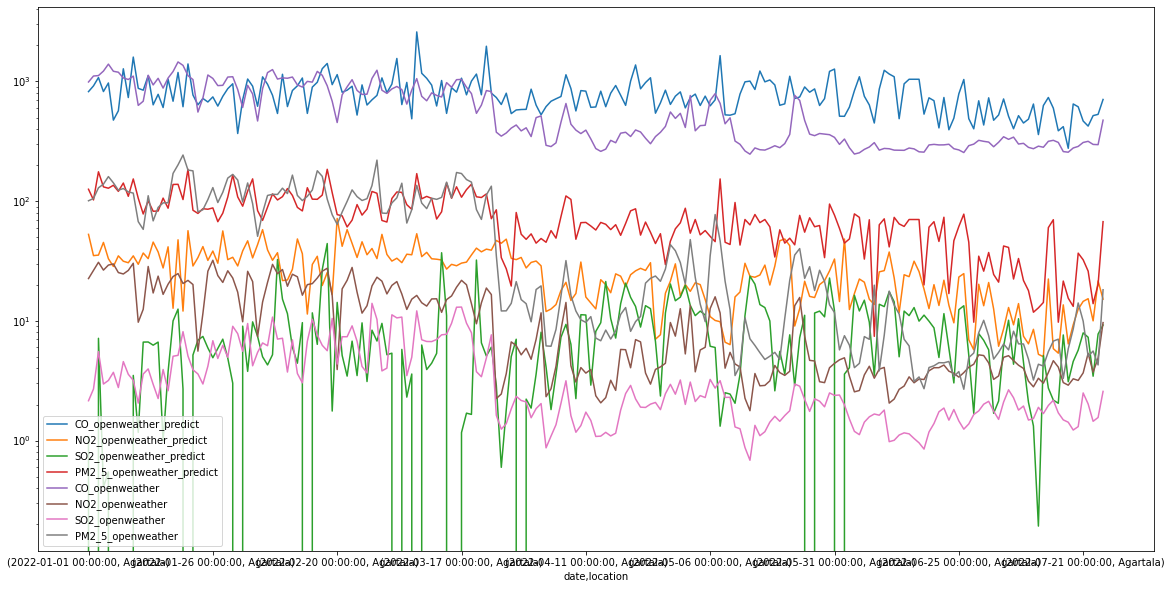

In [52]:
y_compare = y_predict[y_predict.index.get_level_values('location') == 'Agartala']
y_true = y_test[y_test.index.get_level_values('location') == 'Agartala']
ax0 = y_compare.plot(logy=True, figsize=(20,10))
ax1 = y_true.plot(ax=ax0)

In [57]:
y_test['SO2_openweather'].min()

0.2179166666666666